In [2]:
# step one import the data

import pandas as pd

df= pd.read_csv(r"C:\Users\17063\Downloads\DataSetForPhishingVSBenignUrl (3).csv")

print(df.head())

print(df.tail())

   Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0            0                   4                 5                5.5   
1            0                   4                 5                5.5   
2            0                   4                 5                5.5   
3            0                   4                12                5.5   
4            0                   4                 6                5.5   

   longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                  14         4.400000    4               8            3   
1                  14         6.000000    4              12            4   
2                  14         5.800000    4              12            5   
3                  14         5.500000    4              32           16   
4                  14         7.333334    4              18           11   

   ldl_url  ...  SymbolCount_FileName  SymbolCount_Extension  \
0        0  ...             

In [3]:
import numpy as np
# Step 2a: Encode the Target Column
# Convert 'URL_Type_obf_Type' into binary labels: 1 for phishing, 0 for benign
df['URL_Type_obf_Type'] = df['URL_Type_obf_Type'].apply(lambda x: 0 if x == 'Benign' else 1)

# Step 2b: Handle Missing Values
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Step 2c: Handle Infinite Values
# Replace infinite values in 'argPathRatio' with the median of that column
# This avoids issues with large values disrupting the model training
df['argPathRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['argPathRatio'].fillna(df['argPathRatio'].median(), inplace=True)

# Display dataset information to verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36707 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [4]:
#Step 3: Splitting the Data

from sklearn.model_selection import train_test_split
 
    # Step 3a: Separate Features and Target
# Drop the target column 'URL_Type_obf_Type' to create features (X) and set target (y)
X = df.drop(columns=['URL_Type_obf_Type'])
y = df['URL_Type_obf_Type']

# Step 3b: Split the Data into Training and Testing Sets
# 70% of the data is used for training, and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the split datasets to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (25694, 79) (25694,)
Testing set size: (11013, 79) (11013,)


In [6]:
#step 4: Model training and evalaution

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [7]:
# Initialize a list to store results for each model configuration
results = []

# Loop through depths from 1 to 6
for depth in range(1, 7):
    # Test both 'gini' and 'entropy' criteria for each depth
    for criterion in ["gini", "entropy"]:
        # Initialize the Decision Tree model with specified depth and criterion
        model = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=42)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy of the model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append results to the list
        results.append({
            'Depth': depth,
            'Criterion': criterion,
            'Accuracy': accuracy
        })

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

    Depth Criterion  Accuracy
0       1      gini       1.0
1       1   entropy       1.0
2       2      gini       1.0
3       2   entropy       1.0
4       3      gini       1.0
5       3   entropy       1.0
6       4      gini       1.0
7       4   entropy       1.0
8       5      gini       1.0
9       5   entropy       1.0
10      6      gini       1.0
11      6   entropy       1.0


In [8]:
# step 5:model selction and visualization

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


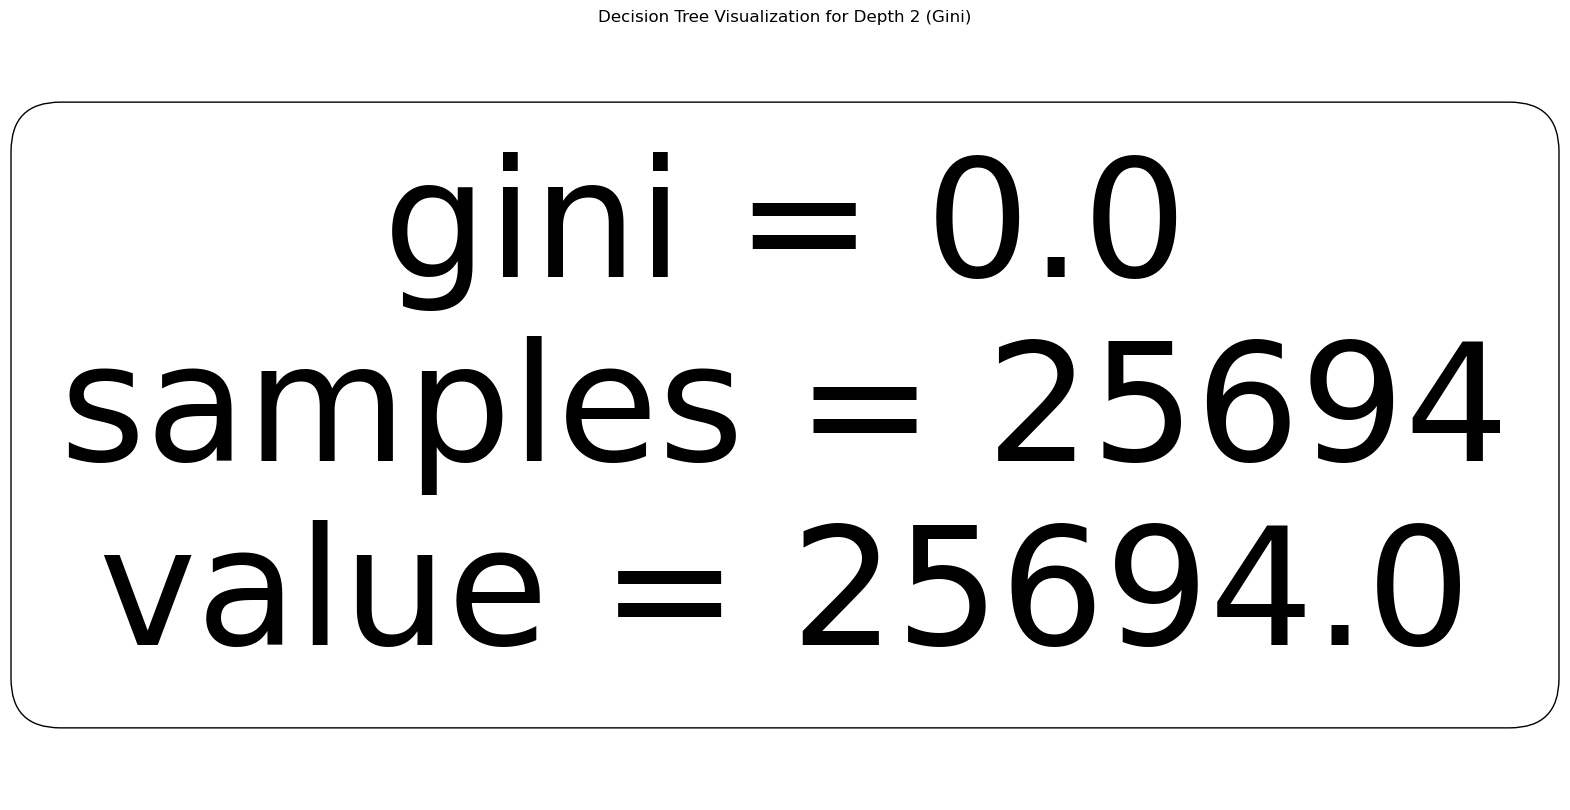

In [9]:
# Select the best model for depth 2 based on accuracy
# Assuming that both Gini and Entropy perform similarly for depth 2, we'll use Gini for visualization here
best_model = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
best_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
plot_tree(best_model, feature_names=X.columns, class_names=["Benign", "Phishing"], filled=True, rounded=True)
plt.title("Decision Tree Visualization for Depth 2 (Gini)")
plt.show()

In [ ]:
#increased the depth to 3